In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Works\bbc-text.csv")  # Replace with your actual file path

# Display basic info
print(df.head())
print(df.info())
print(df["category"].value_counts())  # Check category distribution


        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB
None
category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


In [2]:
import os
os.makedirs("bbc_visuals", exist_ok=True)

In [3]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gowth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gowth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gowth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Tokenize
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return " ".join(words)

# Apply preprocessing
df["clean_text"] = df["text"].apply(preprocess_text)

# Encode categories
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["category_encoded"] = encoder.fit_transform(df["category"])

# Check processed data
print(df.head())


        category                                               text  \
0           tech  tv future in the hands of viewers with home th...   
1       business  worldcom boss  left books alone  former worldc...   
2          sport  tigers wary of farrell  gamble  leicester say ...   
3          sport  yeading face newcastle in fa cup premiership s...   
4  entertainment  ocean s twelve raids box office ocean s twelve...   

                                          clean_text  category_encoded  
0  tv future hand viewer home theatre system plas...                 4  
1  worldcom bos left book alone former worldcom b...                 0  
2  tiger wary farrell gamble leicester say rushed...                 3  
3  yeading face newcastle fa cup premiership side...                 3  
4  ocean twelve raid box office ocean twelve crim...                 1  


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limiting features to 5000 for efficiency

# Transform text data into TF-IDF feature vectors
X = tfidf.fit_transform(df["clean_text"]).toarray()
y = df["category_encoded"]  # Target labels

# Check feature shape
print(f"TF-IDF feature matrix shape: {X.shape}")


TF-IDF feature matrix shape: (2225, 5000)


In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (1780, 5000)
Test data shape: (445, 5000)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
svm = SVC()
random_forest = RandomForestClassifier(n_estimators=100)

# Train models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Accuracy Scores
acc_log = accuracy_score(y_test, y_pred_log)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {acc_log:.4f}")
print(f"SVM Accuracy: {acc_svm:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f}")


Logistic Regression Accuracy: 0.9685
SVM Accuracy: 0.9663
Random Forest Accuracy: 0.9528


In [8]:
from sklearn.metrics import classification_report

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))

print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       101
           1       1.00      0.96      0.98        81
           2       0.93      0.98      0.95        83
           3       0.98      1.00      0.99        98
           4       0.98      0.98      0.98        82

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445

SVM Performance:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       101
           1       0.98      0.98      0.98        81
           2       0.93      0.98      0.95        83
           3       0.98      1.00      0.99        98
           4       0.99      0.96      0.98        82

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97    

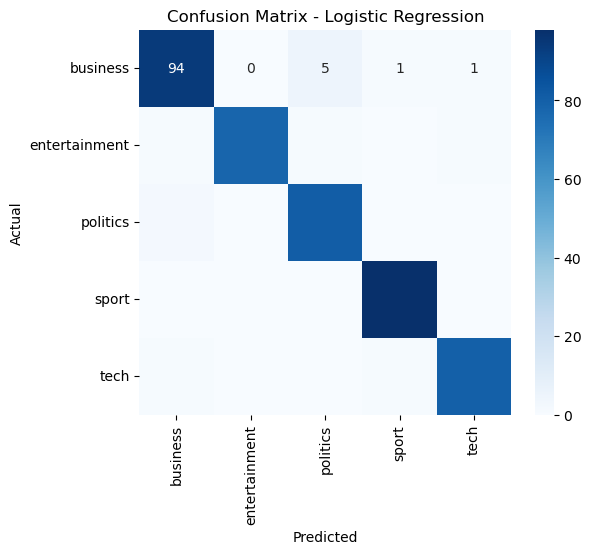

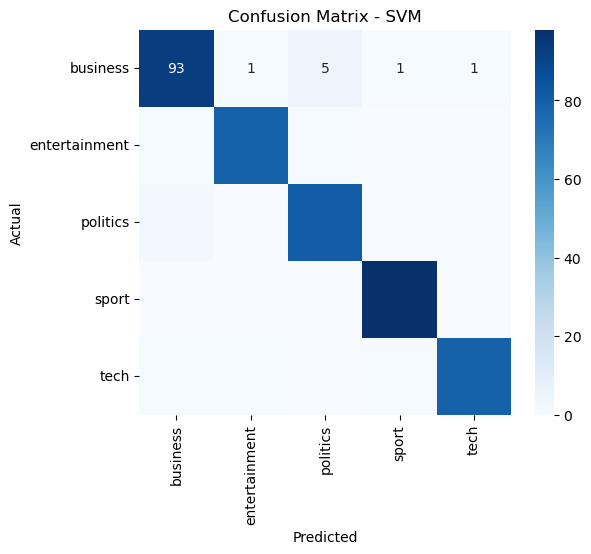

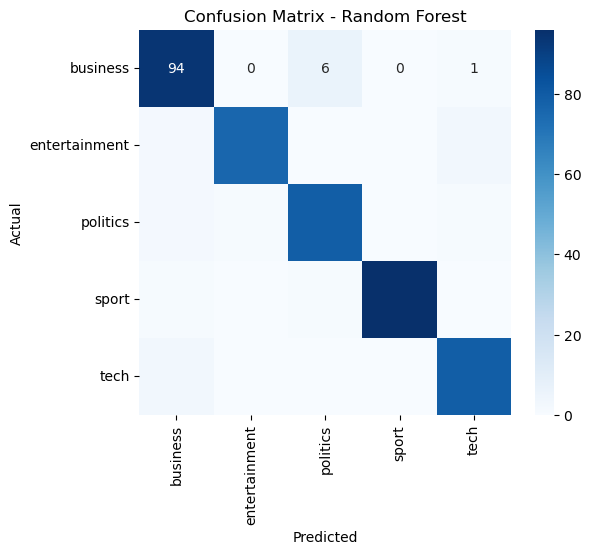

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.savefig("bbc_visuals/image1", dpi=300)

    plt.show()

plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


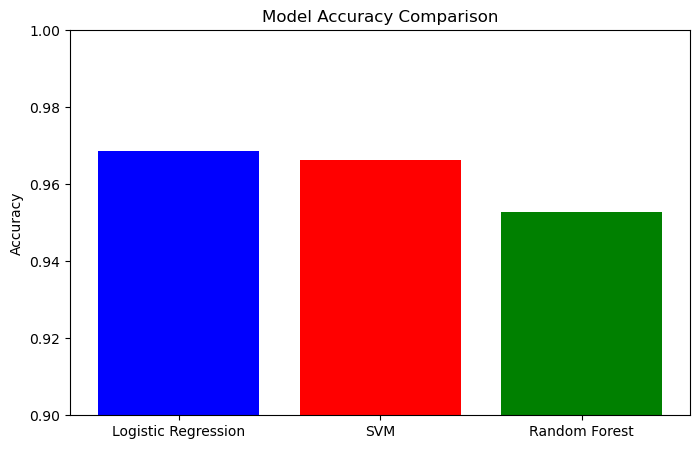

In [11]:
import matplotlib.pyplot as plt
import numpy as np

models = ["Logistic Regression", "SVM", "Random Forest"]
accuracies = [acc_log, acc_svm, acc_rf]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=["blue", "red", "green"])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.9, 1)  # Adjusting scale for better visibility
plt.savefig("bbc_visuals/image2", dpi=300)

plt.show()


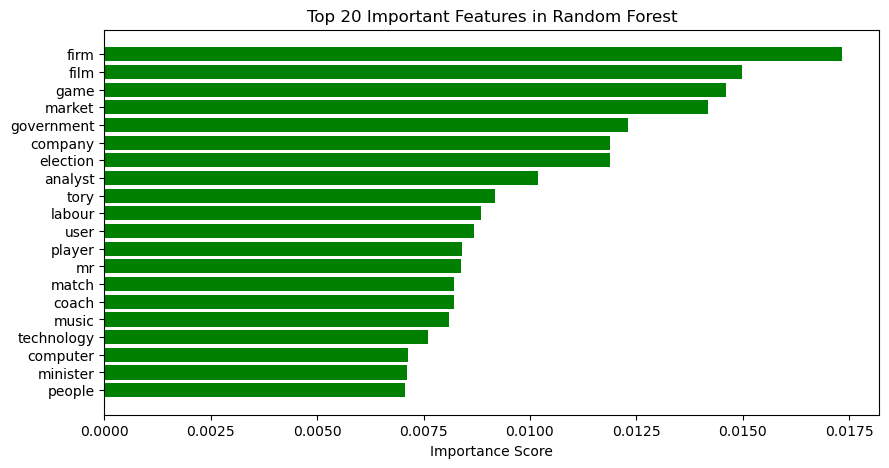

In [12]:
import numpy as np


importance = random_forest.feature_importances_
indices = np.argsort(importance)[-20:]  # Top 20 features

plt.figure(figsize=(10, 5))
plt.barh(np.array(tfidf.get_feature_names_out())[indices], importance[indices], color="green")
plt.xlabel("Importance Score")
plt.title("Top 20 Important Features in Random Forest")
plt.savefig("bbc_visuals/image3", dpi=300)

plt.show()


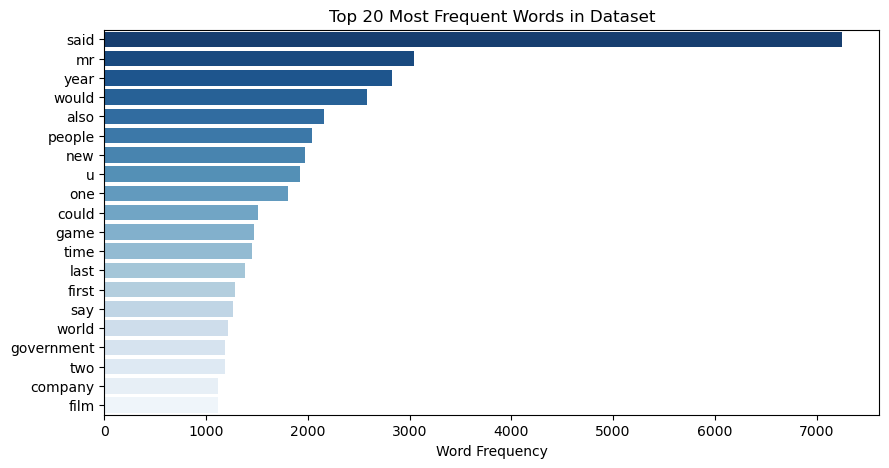

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

all_words = " ".join(df["clean_text"]).split()
word_counts = Counter(all_words)

common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

words = np.array(words)
counts = np.array(counts)

plt.figure(figsize=(10, 5))
sns.barplot(x=counts, y=words, palette="Blues_r")
plt.xlabel("Word Frequency")
plt.title("Top 20 Most Frequent Words in Dataset")
plt.savefig("bbc_visuals/image4", dpi=300)

plt.show()


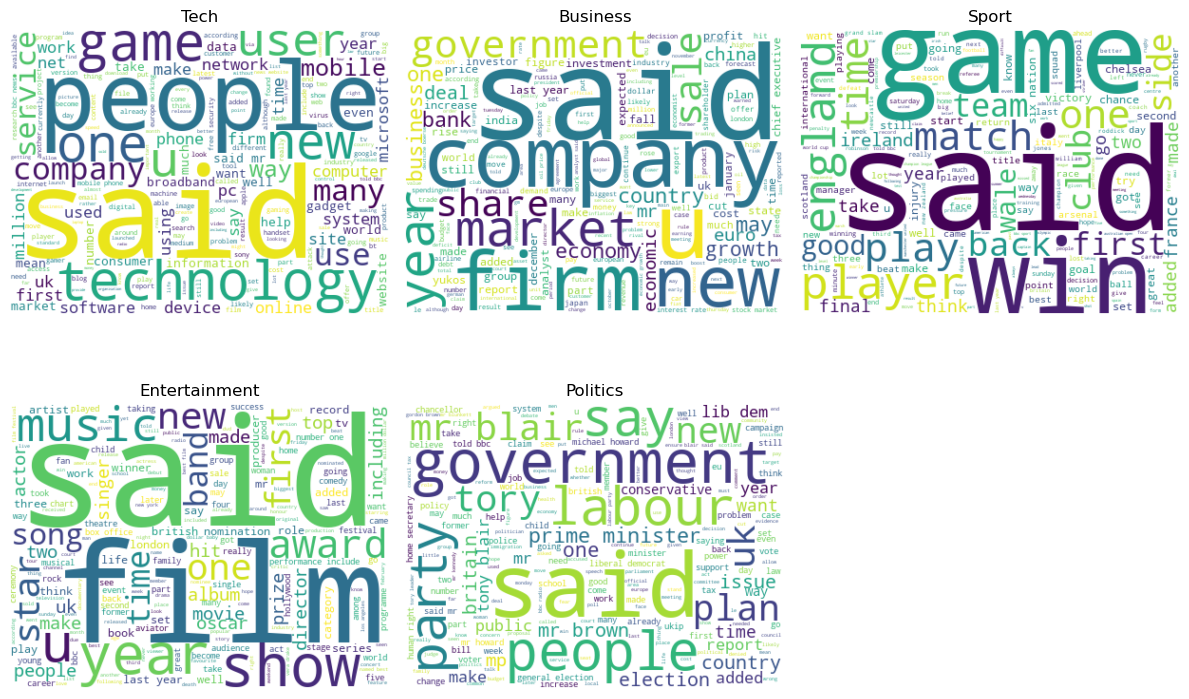

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

categories = df["category"].unique()

plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    plt.subplot(2, 3, i + 1) 
    text = " ".join(df[df["category"] == category]["clean_text"])
    wordcloud = WordCloud(width=400, height=300, background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(category.capitalize())

plt.tight_layout()
plt.savefig("bbc_visuals/image5", dpi=300)

plt.show()


In [15]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.13.0


In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df["clean_text"])
X_seq = tokenizer.texts_to_sequences(df["clean_text"])

X_padded = pad_sequences(X_seq, maxlen=200)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_padded, df["category_encoded"], test_size=0.2, random_state=42)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    LSTM(100),
    Dense(64, activation="relu"),
    Dense(len(df["category"].unique()), activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 738389 (2.82 MB)
Trainable params: 738389 (2.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
56/56 [==============================] - 14s 197ms/step - loss: 1.3647 - accuracy: 0.3989 - val_loss: 0.9562 - val_accuracy: 0.6719
Epoch 2/5
56/56 [==============================] - 10s 173ms/step - loss: 0.7960 - accuracy: 0.7803 - val_loss: 0.6536 - val_accuracy: 0.7910
Epoch 3/5
56/56 [==============================] - 10s 175ms/step - loss: 0.2231 - accuracy: 0.9478 - val_loss: 0.4164 - val_accuracy: 0.8742
Epoch 4/5
56/56 [==============================] - 10s 182ms/step - loss: 0.2238 - accuracy: 0.9433 - val_loss: 0.2861 - val_accuracy: 0.9079
Epoch 5/5
56/56 [==============================] - 11s 197ms/step - loss: 0.0400 - accuracy: 0.9916 - val_loss: 0.2940 - val_accuracy: 0.9079


In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"LSTM Test Accuracy: {accuracy:.4f}")


14/14 [==============================] - 1s 61ms/step - loss: 0.2940 - accuracy: 0.9079
LSTM Test Accuracy: 0.9079


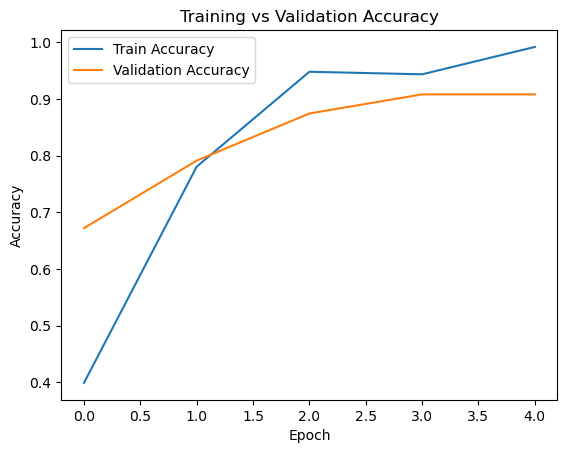

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.savefig("bbc_visuals/image6", dpi=300)

plt.show()


In [22]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    LSTM(100, return_sequences=False),
    Dropout(0.3),  # Dropout after LSTM
    Dense(64, activation="relu"),
    Dropout(0.3),  
    Dense(len(df["category"].unique()), activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          640000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               91600     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 738389 (2.82 MB)
Trainable params: 73838

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/15
56/56 [==============================] - 14s 195ms/step - loss: 1.5652 - accuracy: 0.3697 - val_loss: 1.3750 - val_accuracy: 0.3753
Epoch 2/15
28/56 [==============>...............] - ETA: 6s - loss: 0.9128 - accuracy: 0.6094

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy after 15 Epochs: {accuracy:.4f}")


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.savefig("bbc_visuals/image7", dpi=300)

plt.show()


In [ ]:
from tensorflow.keras.layers import Bidirectional


In [ ]:
model_bi = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    Bidirectional(LSTM(100)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(len(df["category"].unique()), activation="softmax")
])

model_bi.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_bi.summary()


In [ ]:
history_bi = model_bi.fit(
    X_train, y_train,
    epochs=15,                # you can tweak this to match the LSTM setup
    batch_size=32,
    validation_data=(X_test, y_test)
)


In [ ]:
loss_bi, acc_bi = model_bi.evaluate(X_test, y_test)
print(f"BiLSTM Test Accuracy: {acc_bi:.4f}")


In [ ]:
import matplotlib.pyplot as plt


plt.plot(history_bi.history['accuracy'], label='Train Accuracy')
plt.plot(history_bi.history['val_accuracy'], label='Validation Accuracy')
plt.title("BiLSTM Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


plt.plot(history_bi.history['loss'], label='Train Loss')
plt.plot(history_bi.history['val_loss'], label='Validation Loss')
plt.title("BiLSTM Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.savefig("bbc_visuals/image8", dpi=300)

plt.show()


In [ ]:
import matplotlib.pyplot as plt

models = ['LSTM', 'BiLSTM']
accuracies = [0.9056, acc_bi]  # Replace acc_bi with your actual BiLSTM result

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['skyblue', 'salmon'])
plt.ylim(0.85, 1.0)
plt.ylabel("Test Accuracy")
plt.title("Comparison of LSTM vs Bidirectional LSTM")
plt.grid(axis='y')
plt.savefig("bbc_visuals/image9", dpi=300)

plt.show()
